
#	Correcting Data Classification and creating a good database
#	AUTHOR: 乔昂 - jueta
#	DATE: 13/12/2022


In [123]:

import pandas as pd
import json
import matplotlib.pyplot as plt



file_path1 = "joaoData/experiments_05_12/"
sampling_frequency = 1e5

with open(file_path1 + 'exp9' + ".json", 'r') as data_file:    
    data = json.loads(data_file.read())  

print("\data_window\n")
measurements_data_window = pd.json_normalize(data['measurements'])
processing_data_window = pd.json_normalize(data['processing'])
data_window = [measurements_data_window, processing_data_window]
data_window = pd.concat(data_window, axis=1)



\data_window



# correcting Classification

In [124]:

data_window['spray mode.Sjaak'] = data_window['spray mode.Sjaak'].replace(['intermittent 1', 'intermittent'], 'Intermittent')
data_window['spray mode.Sjaak'] = data_window['spray mode.Sjaak'].replace(['cone jet '], 'Cone Jet')
data_window['spray mode.Sjaak'] = data_window['spray mode.Sjaak'].replace(['dripping', 'dripping 1 '], 'Dripping')
data_window['spray mode.Sjaak'] = data_window['spray mode.Sjaak'].replace([''], 'Undefined')

# Creating Multi Jet Classification

In [125]:
data_window['spray mode.Sjaak'] = data_window['spray mode.Sjaak'].replace([''], 'Undefined')
data_window = data_window.dropna()

# Plotting

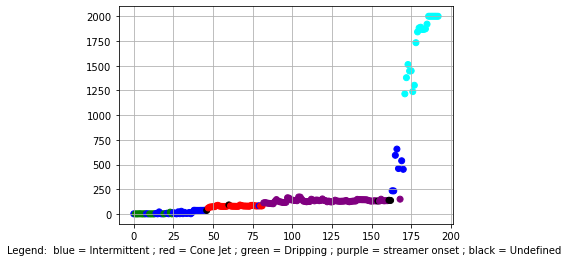

In [131]:

colors = {'Cone Jet':'red', 'Dripping':'green', 'Intermittent':'blue', 'Multi Jet':'purple', 'Undefined':'black', 'Corona':'cyan'}

plt.scatter( data_window.index, data_window['mean'],  c=data_window['spray mode.Sjaak'].map(colors))
plt.grid()

plt.xlabel('Legend:  blue = Intermittent ; red = Cone Jet ; green = Dripping ; purple = streamer onset ; black = Undefined ')
plt.show()



# Correcting Data


In [128]:
data_window[75:85]

,name,data [nA],flow rate [m3/s],voltage,current PS,temperature,humidity,date and time,target voltage,mean,variance,deviation,median,rms,spray mode.Sjaak,spray mode.Monica
75,setup/liquid/ethanol,"[97.35848999023438, 90.06289672851562, 90.0628...",2.777800e-09,6001.29,3.98847e-08,10,10,Mon_05 Dec 2022,6000,87.480232,15.787815,3.973388,87.295601,87.570427,Cone Jet,no streamer onset
76,setup/liquid/ethanol,"[83.27043914794922, 86.7924575805664, 77.23270...",2.777800e-09,6001.29,3.98847e-08,10,10,Mon_05 Dec 2022,6000,83.568626,11.622869,3.409233,83.522011,83.638130,Cone Jet,no streamer onset
77,setup/liquid/ethanol,"[83.52201080322266, 79.24528503417969, 82.7672...",2.777800e-09,6001.29,3.98847e-08,10,10,Mon_05 Dec 2022,6000,81.462662,13.843820,3.720728,81.509430,81.547592,Cone Jet,no streamer onset
78,setup/liquid/ethanol,"[80.50314331054688, 80.0, 80.50314331054688, 8...",2.777800e-09,6001.29,3.98847e-08,10,10,Mon_05 Dec 2022,6000,80.817657,11.564298,3.400632,80.754723,80.889175,Cone Jet,no streamer onset
79,setup/liquid/ethanol,"[83.27043914794922, 80.0, 84.27672576904297, 8...",2.777800e-09,6001.29,3.98847e-08,10,10,Mon_05 Dec 2022,6000,82.984161,1792.326538,42.335876,80.251572,93.159523,Intermittent,no streamer onset
80,setup/liquid/ethanol,"[80.25157165527344, 82.5157241821289, 79.74842...",2.777800e-09,6001.29,3.98847e-08,10,10,Mon_05 Dec 2022,6000,80.861168,13.399652,3.660554,80.754723,80.943985,Cone Jet,no streamer onset
81,setup/liquid/ethanol,"[79.24528503417969, 82.76729583740234, 83.5220...",2.777800e-09,6001.29,3.98847e-08,10,10,Mon_05 Dec 2022,6000,82.075829,12.725838,3.567329,82.012581,82.153320,Cone Jet,no streamer onset
82,setup/liquid/ethanol,"[75.4717025756836, 73.710693359375, 77.4842834...",2.777800e-09,6301.04,4.3463e-08,10,10,Mon_05 Dec 2022,6300,112.913132,64.788239,8.049114,114.465408,113.199661,Cone Jet,no streamer onset
83,setup/liquid/ethanol,"[118.99370574951172, 114.71698760986328, 117.4...",2.777800e-09,6301.04,4.3463e-08,10,10,Mon_05 Dec 2022,6300,115.558777,13.154943,3.626974,115.471695,115.615685,Cone Jet,no streamer onset
84,setup/liquid/ethanol,"[111.1949691772461, 108.42767333984375, 110.94...",2.777800e-09,6301.04,4.3463e-08,10,10,Mon_05 Dec 2022,6300,110.529800,13.123295,3.622609,110.440254,110.589157,Cone Jet,no streamer onset


In [130]:
data_window[170:] = data_window[170:].replace(['Cone Jet', 'Undefined'], 'Corona')

# Data to be Exported

In [132]:
data_exported = data_window.loc[:, ["data [nA]", "spray mode.Sjaak"]]
data_exported.rename(columns = {'data [nA]':'data', 'spray mode.Sjaak':'class'}, inplace = True)
data_exported.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    193 non-null    object
 1   class   193 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [133]:
file_exported_name = "data9"
data_exported.to_feather('../classified_data/'+ file_exported_name + '.feather')